In [4]:
import pandas as pd # импортируем Pandas
%matplotlib inline

In [174]:
data = pd.read_csv('/Users/Lenovo/Downloads/train.csv') 

# 1 Зависимость выживаемости от цены билета

In [42]:
len(data[data.Fare.isnull()]) # проверим, есть ли значения Nan в столбце Fare


0

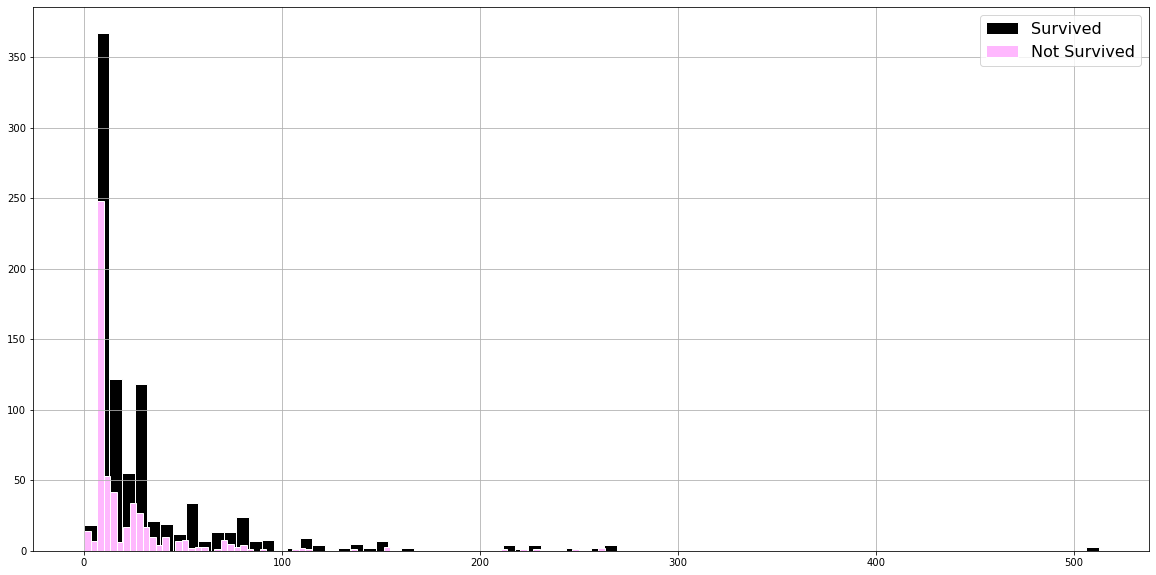

In [36]:
ax = data['Fare'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True, color='#000000')

data[data['Survived'] == 0]['Fare'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='#ffb8fe')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})



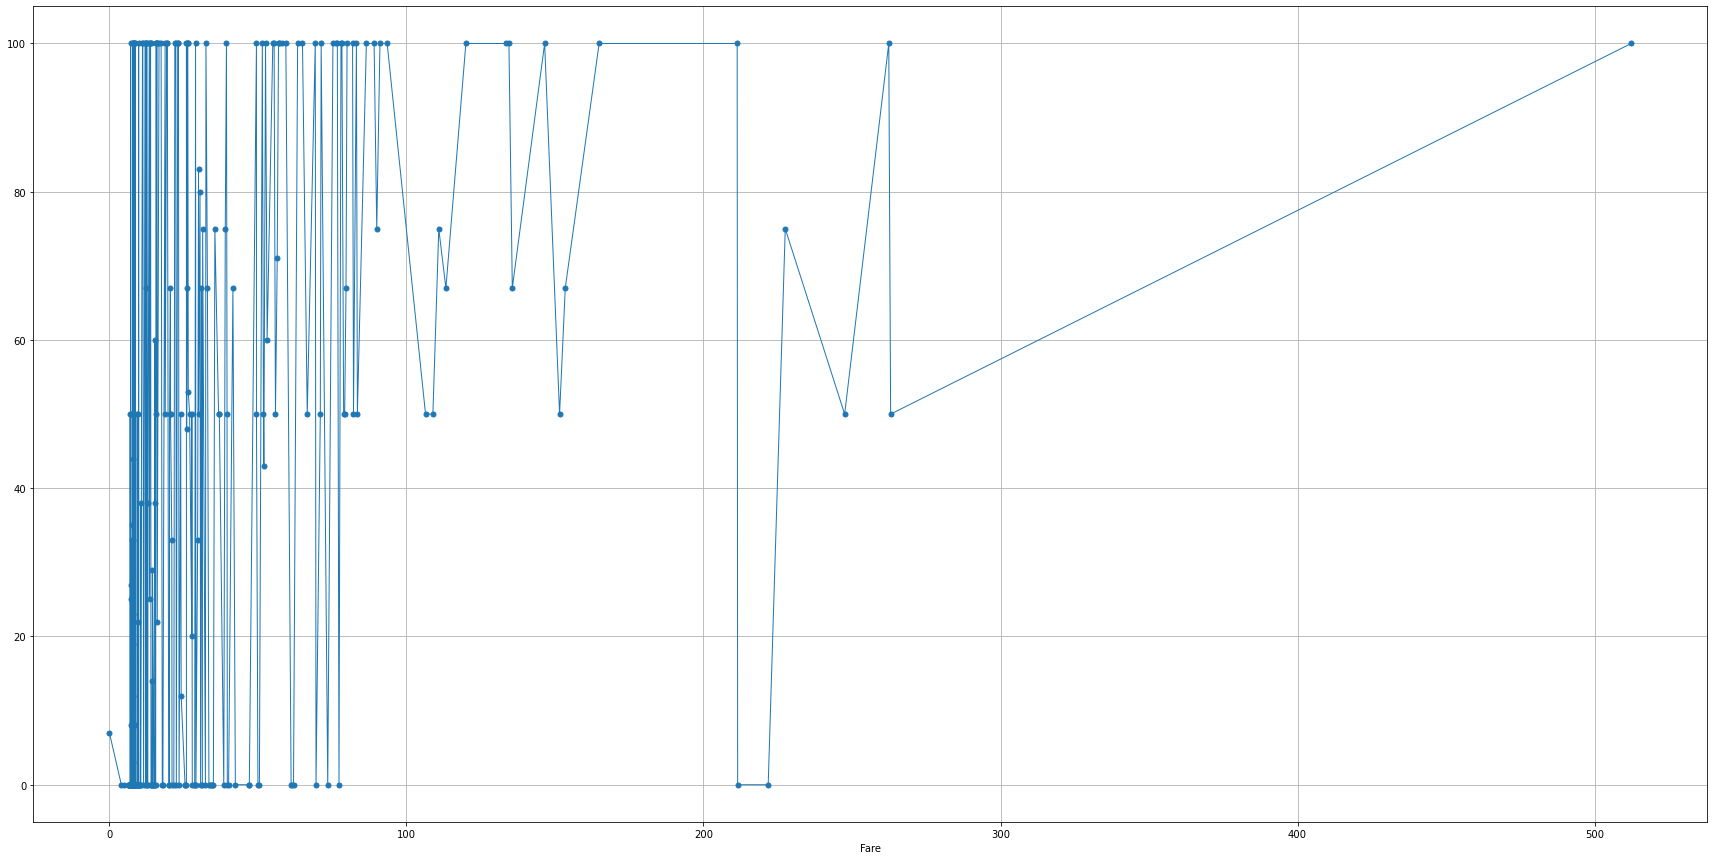

In [81]:
series = round(100 * data.groupby(['Fare'])['Survived'].sum() / data.groupby(['Fare'])['PassengerId'].nunique())
series.plot(figsize=(30, 15), linestyle='-', marker='o', markersize=5, grid=True, lw=1)

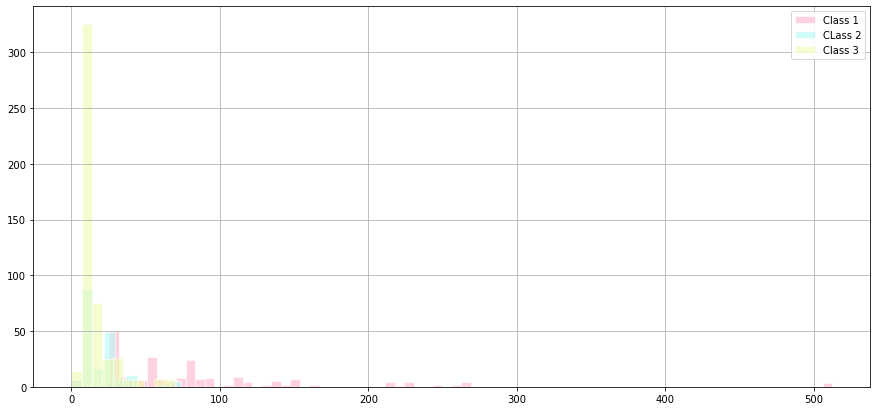

In [110]:
ax =data[data.Pclass == 1]['Fare'].hist(figsize=(15, 7), bins=80, edgecolor='white', alpha=0.6, color='#ffb5cb')
data[data.Pclass == 2]['Fare'].hist(figsize=(15, 7), bins=10, edgecolor='white', alpha=0.6, color='#b4faf8')
data[data.Pclass == 3]['Fare'].hist(figsize=(15, 7), bins=10, edgecolor='white', alpha=0.6, color='#effab1')

ax.legend(['Class 1', 'CLass 2', 'Class 3'])

In [ ]:
# В результате анализа мы пришли к тому, что фактор стоимости билета в большей степени не показателен

# 2 Зависимость выживаемости от пола

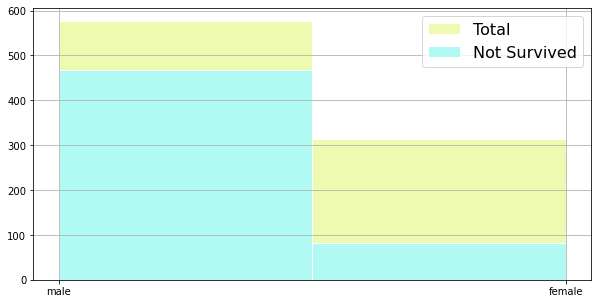

In [122]:
ax = data['Sex'].hist(figsize=(10, 5), bins=2, edgecolor='white', grid=True, color='#effab1')

data[data['Survived'] == 0]['Sex'].hist(figsize=(10, 5), bins=2, 
                                          edgecolor='white', grid=True, color='#b1faf3')
ax.legend(['Total','Not Survived'], prop={'size':16})

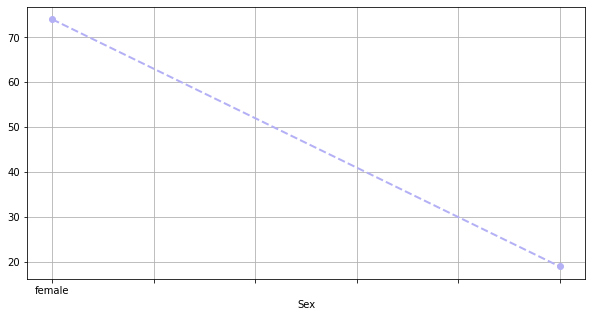

In [145]:
series = round(100 * data.groupby(['Sex'])['Survived'].sum() / data.groupby(['Sex'])['PassengerId'].nunique())
series.plot(figsize = (10, 5), linestyle = '--', marker = 'o', markersize = 6, grid = True, lw=2, color='#b4b0f5')

In [ ]:
# Проанализировав гистограмму и процентную зависимость, показанную на графике,
# можем сделать вывод, что процент выживаемости у женщин выше

# 3 Зависимость выживаемости от возраста

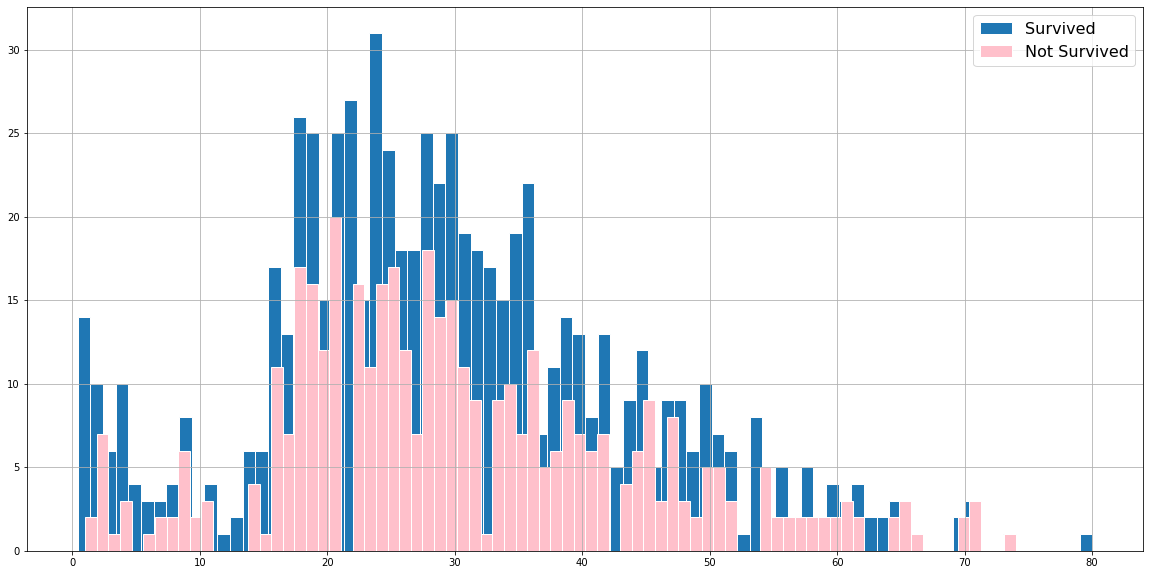

In [165]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

data[data['Survived'] == 0]['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='pink')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

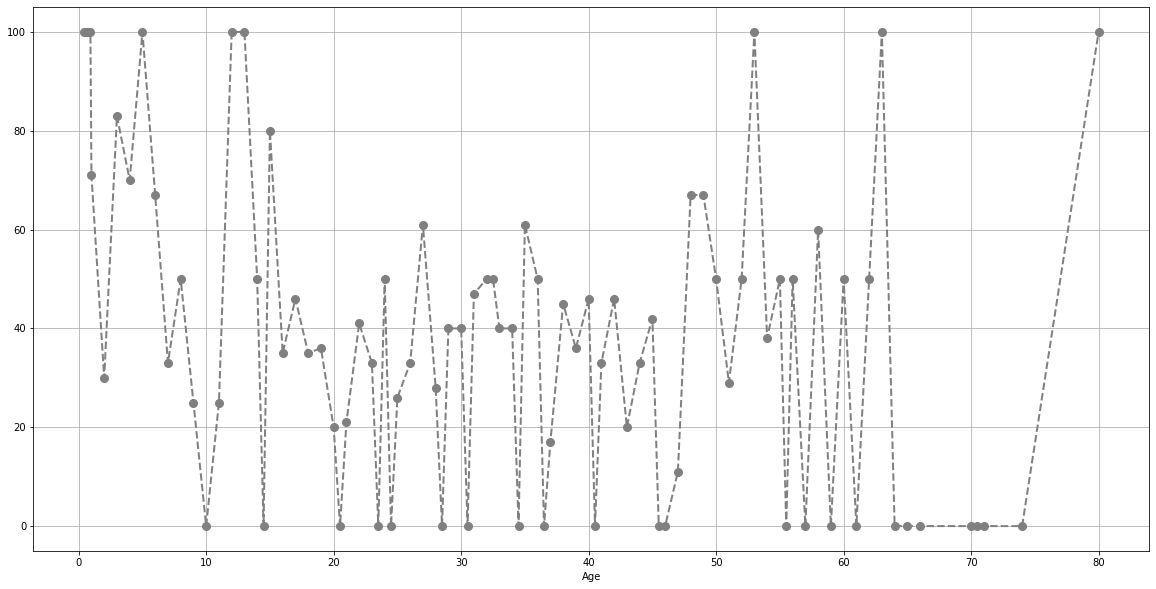

In [184]:
age= round(100 * data.groupby(['Age'])['Survived'].sum() / data.groupby(['Age'])['PassengerId'].nunique())
age.plot(figsize=(20, 10), linestyle='--', marker='o', markersize=8, grid=True, lw=2, c = 'grey')

In [ ]:
# Однозначно видимой зависимости от возраста не прослеживается

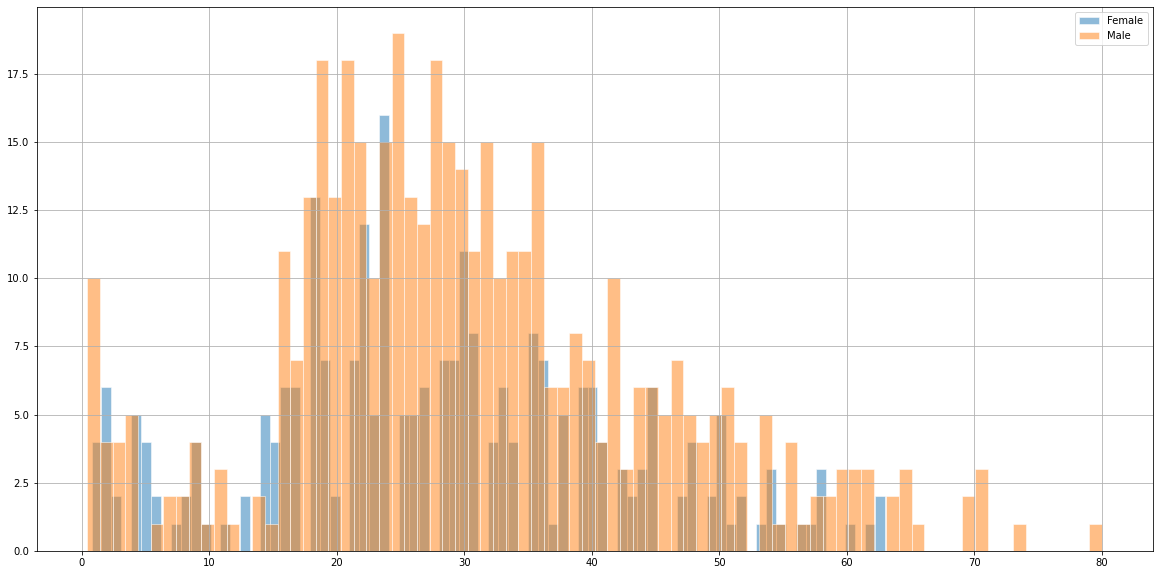

In [181]:
ax =data[data.Sex == 'female']['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
data[data.Sex == 'male']['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Female', 'Male'])

In [ ]:
# Корреляцию между возрастом и полом проследить тяжело

# 4 Зависимость выживаемости от порта посадки

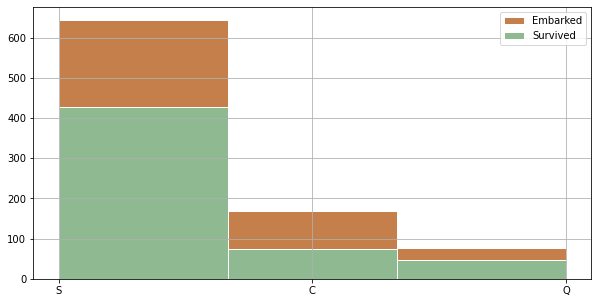

In [182]:
ax = data['Embarked'].hist(figsize = (10, 5), bins=3, edgecolor = 'white',grid = True, color = '#c47f4b')
data[data['Survived'] == 0]['Embarked'].hist(figsize = (10, 5), bins = 3, edgecolor = 'white', grid = True, color = '#8fba91')
ax.legend(['Embarked', 'Survived'])


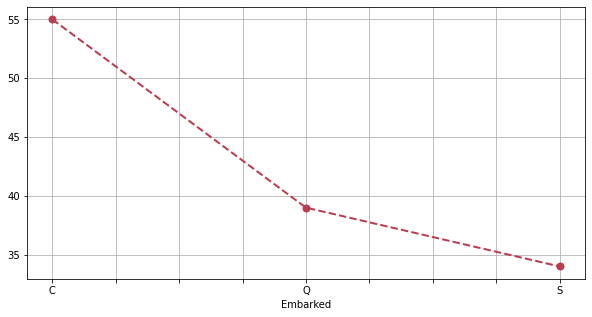

In [147]:
emb = round(100 * data.groupby(['Embarked'])['Survived'].sum() / data.groupby(['Embarked'])['PassengerId'].nunique())
emb.plot(figsize = (10, 5), linestyle = '--', marker = 'o', markersize = 7, grid = True, lw = 2, color = '#ba3c4f')

In [ ]:
# Проанализировав гистограмму и процентную зависимость, показанную на графике,
# можем сделать вывод, что процент смертности значительно падает в ряду C-Q-S

# 5 Зависимость выживаемости от класса

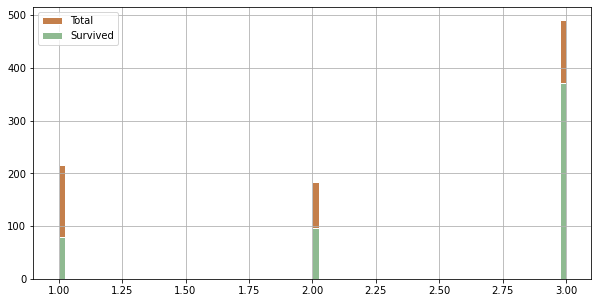

In [183]:
ax = data['Pclass'].hist(figsize = (10, 5), bins=80, edgecolor = 'white',grid = True, color = '#c47f4b')
data[data['Survived'] == 0]['Pclass'].hist(figsize = (10, 5), bins = 80, edgecolor = 'white', grid = True, color = '#8fba91')
ax.legend(['Total', 'Survived'])


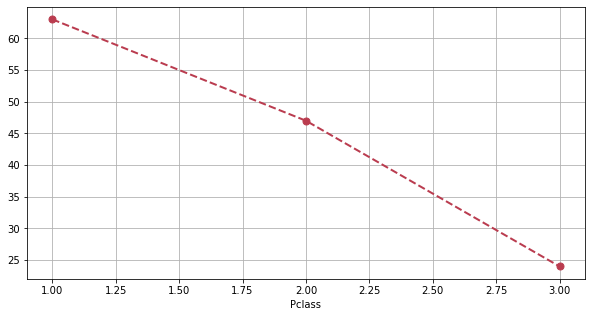

In [159]:
cl = round(100 * data.groupby(['Pclass'])['Survived'].sum() / data.groupby(['Pclass'])['PassengerId'].nunique())
cl.plot(figsize = (10, 5), linestyle = '--', marker = 'o', markersize = 7, grid = True, lw = 2, color = '#ba3c4f')

In [ ]:
# Проанализировав гистограмму и процентную зависимость, показанную на графике,
# можем сделать вывод, что процент смертности у пассажиров третьего класса значительно выше.

# 6 Зависимость между стоимостью билета и портом посадки

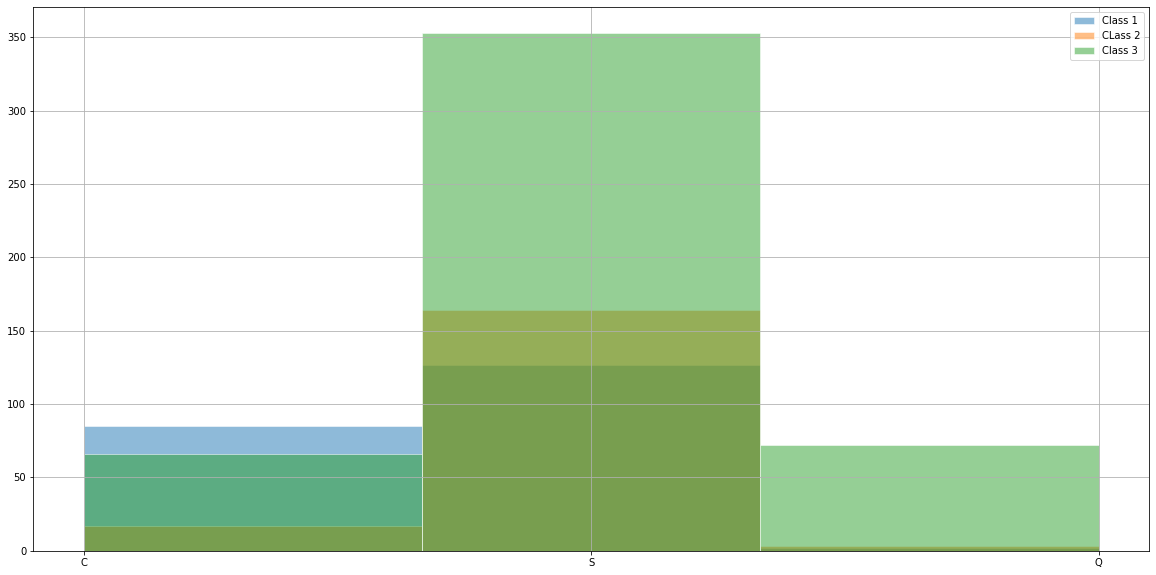

In [162]:
ax = data[data.Pclass == 1]['Embarked'].hist(figsize=(20, 10), bins=3, edgecolor='white', alpha=0.5)
data[data.Pclass == 2]['Embarked'].hist(figsize=(20, 10), bins=3, edgecolor='white', alpha=0.5)
data[data.Pclass == 3]['Embarked'].hist(figsize=(20, 10), bins=3, edgecolor='white', alpha=0.5)

ax.legend(['Class 1', 'CLass 2', 'Class 3'])

In [164]:
# Наглядно, что существует корреляция между классом билета и портом посадки, 
# которая и объясняет нам неочевидную закономерность смертности от порта

# # Вывод: в большей степени выживаемость пассажира зависела от класса билета